# 3 player fair division

Ce notebook Jupyter a été créé à l'occasion d'un projet pour le cours de CoCoMA à l'université Sorbonne Sciences dans le cadre du M2 du master ANDROIDE.

Travail par:
* Alexis Devillard
* Elias Hanna

Rendu le 28 janvier 2019.

## 1. Description du projet

L’objectif de ce projet est de prolonger l’article “Comparing direct algorithms for two-player fair division of indivisible items – A computational study” de D. Marc Kilgour et Rudolf Vetschera. Cette article vise à évaluer 11 algorithmes d’allocations d’objets pour deux agents.

Nous avons décidé de poursuivre cet article en évaluant les adaptations de trois des algorithmes (OS, BU, TR)  dans le cas d’un partage entre 3 agents. 

### Choix:
* Objets indivisibles.
* Nombre d'agents:    3
* Allocations équilibrés (tous les agents finnissent avec le même nombre d'objets)
* Nombre d'objets :   3, 6, ...
* Algorithmes adaptés: 
    * Original Sequential
    * Bottom Up
    * Trump

**Note:** Pour chaque set de 3 agents (3 préférences) chacun des algorithmes devra renvoyé une liste d'allocations. En effet à chaque choix arbitraire (ordre des agents, ordres des trio possible, etc) une allocation différente apparait et doit être prise en compte.


## 2. Environnement utilisé

Nous avons crée deux objets:
* **Agent**:
    Contient un ordre de préférence (un ranking) pour chaque objet.
* **Allocation**:
    Contient une liste d'objets alloués pour chaque agent.

In [1]:
from agent import Agent
from agent import Allocation
from agent import AllAgents
from agent import AllAllocations
from agent import prefs_are_not_same
from OS import run_OS
from BU import run_BU
from TR import run_TR
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
import sys

<Figure size 640x480 with 1 Axes>

Ici une petite démonstration de l'utilisation de l'objet **Agent**.

In [2]:
nb_objets = 6
agent_1 = Agent(nb_objets, [1,2,3,4,5,6])
agent_2 = Agent(nb_objets, [5,6,1,2,3,4])
agent_3 = Agent(nb_objets, [3,4,5,6,1,2])

print("Ranks[object] : ")
agent_1.show_preferences()
agent_2.show_preferences()
agent_3.show_preferences()
print("Objects[rank] : ")
agent_1.show_ranked_obj()
agent_2.show_ranked_obj()
agent_3.show_ranked_obj()


Ranks[object] : 
[1, 2, 3, 4, 5, 6]
[5, 6, 1, 2, 3, 4]
[3, 4, 5, 6, 1, 2]
Objects[rank] : 
[0, 1, 2, 3, 4, 5]
[2, 3, 4, 5, 0, 1]
[4, 5, 0, 1, 2, 3]


In [3]:
nb_objets = 6
agent_1 = Agent(nb_objets, [1,2,3,4,5,6])
agent_2 = Agent(nb_objets, [5,6,1,2,3,4])
agent_3 = Agent(nb_objets, [3,4,5,6,1,2])
agents = [agent_1, agent_2, agent_3]

allocations = AllAllocations(nb_objets, agents)
allocations.show_all_allocs()

100% processed !
Total time elapsed: 0.0 minutes and 0.0855746269226 seconds
Number of allocs: 90
-------------------
1th alloc
[[0, 1], [3, 5], [2, 4]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
2th alloc
[[2, 5], [0, 4], [1, 3]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
3th alloc
[[0, 2], [4, 5], [1, 3]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
4th alloc
[[1, 5], [2, 4], [0, 3]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
5th alloc
[[3, 4], [2, 5], [0, 1]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
6th alloc
[[3, 4], [1, 5], [0, 2]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
7th alloc
[[1, 3], [0, 2], [4, 5]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
8th alloc
[[0,

[[0, 5], [1, 4], [2, 3]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
68th alloc
[[3, 4], [0, 1], [2, 5]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
69th alloc
[[1, 4], [0, 3], [2, 5]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', True)
-------------------
70th alloc
[[4, 5], [2, 3], [0, 1]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
71th alloc
[[0, 5], [2, 3], [1, 4]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
72th alloc
[[3, 5], [0, 2], [1, 4]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
73th alloc
[[0, 2], [3, 5], [1, 4]]
('Is Borda pareto optimal: ', True)
('Is Borda envy free: ', False)
-------------------
74th alloc
[[2, 5], [0, 1], [3, 4]]
('Is Borda pareto optimal: ', False)
('Is Borda envy free: ', False)
-------------------
75th alloc
[[

## 3. Algorithmes
Les algoritmes implémentés prennent en argument une liste d'agents et renvoie tous une liste d'objets **allocation**.

In [4]:
allocation = run_OS([agent_1,agent_2,agent_3], nb_objets)
#allocation = run_BU([agent_1,agent_2,agent_3], nb_objets)
#allocation = run_TR([agent_1,agent_2,agent_3], nb_objets)
print("nb allocation found:" , len(allocation))
for alloc in allocation:
    alloc.simple_show()
    #print(alloc.pareto_optimal())
    print(alloc.compute_utility())
    print(alloc.borda_pareto_optimal())
    

('nb allocation found:', 1)
[[0, 1], [2, 3], [4, 5]]
[9, 9, 9]
True


La fonction allAgent renvoie une liste de tous les sets de 3 objets **Agent** possible.

In [5]:
nb_objets = 3
all_agents = AllAgents(nb_objets)

100% processed !
Total time elapsed: 0.0 minutes and 0.0416812896729 seconds


On execute OS, BU et TR sur tous les sets d'agents possible. 

In [6]:
all_set = all_agents.get_all_sets()
for i in range(0, len(all_set)):
    agent_1 = all_set[i][0]
    agent_2 = all_set[i][1]
    agent_3 = all_set[i][2]
    print("-------------------")
    print(str(i+1)+"th set")
    if(prefs_are_not_same(agent_1, agent_2, agent_3)):
        try:
            allocations_OS = run_OS([agent_1,agent_2,agent_3], nb_objets)
            print("nb allocation found:" , len(allocation))
            for alloc in allocations_OS:
                alloc.simple_show()
                #print(alloc.pareto_optimal())
                print(alloc.borda_pareto_optimal())
                print(alloc.compute_utility())
        except RecursionError as error:
            print("RecursionError:"+ str(error))
    else:
        print("The prefs for all agents are the same, useless to think about it")

-------------------
1th set
The prefs for all agents are the same, useless to think about it
-------------------
2th set
('nb allocation found:', 1)
[[0], [1], [2]]
True
[2, 1, 1]
[[1], [0], [2]]
True
[1, 2, 1]
-------------------
3th set
('nb allocation found:', 1)
[[0], [1], [2]]
True
[2, 1, 0]
[[0], [2], [1]]
True
[2, 0, 2]
[[1], [0], [2]]
True
[1, 2, 0]
[[1], [2], [0]]
False
[1, 0, 1]
[[2], [0], [1]]
True
[0, 2, 2]
[[2], [1], [0]]
False
[0, 1, 1]
-------------------
4th set
('nb allocation found:', 1)
[[0], [1], [2]]
True
[2, 1, 2]
[[1], [0], [2]]
True
[1, 2, 2]
-------------------
5th set
('nb allocation found:', 1)
[[0], [1], [2]]
True
[2, 1, 1]
[[1], [0], [2]]
True
[1, 2, 1]
-------------------
6th set
('nb allocation found:', 1)
[[0], [1], [2]]
True
[2, 1, 2]
[[1], [0], [2]]
True
[1, 2, 2]
-------------------
7th set
('nb allocation found:', 1)
[[0], [2], [1]]
True
[2, 1, 1]
[[1], [2], [0]]
True
[1, 1, 2]
-------------------
8th set
('nb allocation found:', 1)
[[1], [0], [2]]
T

[2, 2, 1]
-------------------
73th set
('nb allocation found:', 1)
[[0], [1], [2]]
False
[1, 1, 0]
[[0], [2], [1]]
False
[1, 0, 1]
[[1], [0], [2]]
True
[2, 2, 0]
[[1], [2], [0]]
True
[2, 0, 2]
[[2], [0], [1]]
True
[0, 2, 1]
[[2], [1], [0]]
True
[0, 1, 2]
-------------------
74th set
('nb allocation found:', 1)
[[0], [1], [2]]
False
[1, 1, 1]
[[1], [0], [2]]
True
[2, 2, 1]
-------------------
75th set
('nb allocation found:', 1)
[[0], [1], [2]]
False
[1, 1, 0]
[[0], [2], [1]]
True
[1, 0, 2]
[[1], [0], [2]]
True
[2, 2, 0]
[[1], [2], [0]]
True
[2, 0, 1]
[[2], [0], [1]]
True
[0, 2, 2]
[[2], [1], [0]]
False
[0, 1, 1]
-------------------
76th set
('nb allocation found:', 1)
[[1], [0], [2]]
True
[2, 2, 2]
-------------------
77th set
('nb allocation found:', 1)
[[0], [1], [2]]
False
[1, 1, 1]
[[1], [0], [2]]
True
[2, 2, 1]
-------------------
78th set
('nb allocation found:', 1)
[[1], [0], [2]]
True
[2, 2, 2]
-------------------
79th set
('nb allocation found:', 1)
[[0], [2], [1]]
False
[1, 1

-------------------
144th set
('nb allocation found:', 1)
[[0], [1], [2]]
True
[1, 1, 2]
[[0], [2], [1]]
True
[1, 2, 1]
-------------------
145th set
('nb allocation found:', 1)
[[2], [0], [1]]
True
[1, 2, 1]
[[2], [1], [0]]
True
[1, 1, 2]
-------------------
146th set
('nb allocation found:', 1)
[[1], [0], [2]]
True
[2, 2, 1]
[[2], [1], [0]]
True
[1, 1, 2]
-------------------
147th set
('nb allocation found:', 1)
[[2], [0], [1]]
True
[1, 2, 2]
[[2], [1], [0]]
False
[1, 1, 1]
-------------------
148th set
('nb allocation found:', 1)
[[1], [0], [2]]
True
[2, 2, 2]
-------------------
149th set
('nb allocation found:', 1)
[[1], [0], [2]]
True
[2, 2, 1]
[[2], [0], [1]]
True
[1, 2, 2]
-------------------
150th set
('nb allocation found:', 1)
[[1], [0], [2]]
True
[2, 2, 2]
-------------------
151th set
('nb allocation found:', 1)
[[1], [2], [0]]
True
[2, 1, 2]
[[2], [0], [1]]
True
[1, 2, 1]
-------------------
152th set
('nb allocation found:', 1)
[[1], [0], [2]]
True
[2, 2, 1]
[[1], [2], [

True
[1, 2, 1]
[[2], [1], [0]]
True
[2, 1, 1]
-------------------
215th set
('nb allocation found:', 1)
[[0], [1], [2]]
False
[0, 1, 1]
[[0], [2], [1]]
True
[0, 2, 2]
[[1], [0], [2]]
False
[1, 0, 1]
[[1], [2], [0]]
True
[1, 2, 0]
[[2], [0], [1]]
True
[2, 0, 2]
[[2], [1], [0]]
True
[2, 1, 0]
-------------------
216th set
The prefs for all agents are the same, useless to think about it


Dans la cellule ci-dessous est fait le calcul du nombre d'allocations trouvées par chaque algorithme, ainsi que le nombre d'allocations Pareto optimales et envy free au sens du score de Borda.
Ces valeurs sont ensuites réutilisées pour produire les tableaux plus loins dans le notebook.

In [14]:
nb_rep = 10000
nb_objets_max = 6

total_allocs_OS = [0]*(nb_objets_max//3)
total_allocs_BU = [0]*(nb_objets_max//3)

total_borda_pareto_optimal_OS = [0]*(nb_objets_max//3)
total_borda_pareto_optimal_BU = [0]*(nb_objets_max//3)

total_borda_envy_free_OS = [0]*(nb_objets_max//3)
total_borda_envy_free_BU = [0]*(nb_objets_max//3)

total_time = 0

for nb_objets in range(3, nb_objets_max + 1, 3):
    for i in range(0, nb_rep):
        start = time.time()
        
        agent_1 = Agent(nb_objets)
        agent_2 = Agent(nb_objets)
        agent_3 = Agent(nb_objets)
        agents = [agent_1,agent_2,agent_3]

        if(prefs_are_not_same(agent_1, agent_2, agent_3)):
            try:
                allocations_OS = run_OS(agents, nb_objets)
                allocations_BU = run_BU(agents, nb_objets)

                for alloc in allocations_OS:
                    total_allocs_OS[nb_objets//3 - 1] += len(allocations_OS)
                    total_borda_pareto_optimal_OS[nb_objets//3 - 1] += len([al for al in allocations_OS if al.borda_pareto_optimal()])
                    total_borda_envy_free_OS[nb_objets//3 - 1] += len([al for al in allocations_OS if al.borda_envy_free()])
                
                for alloc in allocations_BU:
                    total_allocs_BU[nb_objets//3 - 1] += len(allocations_BU)
                    total_borda_pareto_optimal_BU[nb_objets//3 - 1] += len([al for al in allocations_BU if al.borda_pareto_optimal()])
                    total_borda_envy_free_BU[nb_objets//3 - 1] += len([al for al in allocations_BU if al.borda_envy_free()])

            except RecursionError as error:
                print("RecursionError:"+ str(error))
        else:
            pass
            #print("The prefs for all agents are the same, useless to think about it")
            
        end = time.time()
        total_time += (end - start)
        remaining = (total_time/(nb_objets//3*i + 1) * ((nb_objets_max//3*nb_rep) - (nb_objets//3*i)))
        clear_output(wait=True)
        print("Processing: " + str((nb_objets//3*i)/(nb_objets_max//3*nb_rep) * 100) + '%')
        print("Approximate remaining time: " + str(remaining//60) + " minutes and " + str(remaining%60) + " seconds")
            
        

# Final print
clear_output(wait=True)
print("100% processed !")
print("Total time elapsed: " + str(total_time//60) + " minutes and " + str(total_time%60) + " seconds")

NameError: name 'RecursionError' is not defined

In [29]:
print(total_allocs_OS, total_borda_pareto_optimal_OS, total_borda_envy_free_OS)
print(total_allocs_BU, total_borda_pareto_optimal_BU, total_borda_envy_free_BU)
total_allocs_OS=[1,1]
total_allocs_BU=[1,1]
result_avg=[[i/nb_rep for i in total_allocs_OS], [i/nb_rep] for i in total_allocs_BU]
result_uni=[total_borda_pareto_optimal_OS[i]/total_allocs_OS[i] for i in range(len(total_allocs_OS)), total_borda_pareto_optimal_BU[i]/total_allocs_BU[i] for i in range(len(total_allocs_OS))]
result_par=[total_borda_pareto_optimal_OS[i]/total_allocs_OS[i] for i in range(len(total_allocs_OS)), total_borda_pareto_optimal_BU[i]/total_allocs_BU[i] for i in range(len(total_allocs_OS))]
result_env=[total_borda_envy_free_OS[i]/total_allocs_OS[i] for i in range(len(total_allocs_OS)), total_borda_envy_free_BU[i]/total_allocs_BU[i] for i in range(len(total_allocs_OS))]
print result_avg

SyntaxError: invalid syntax (<ipython-input-29-a1456e39d6dd>, line 5)

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

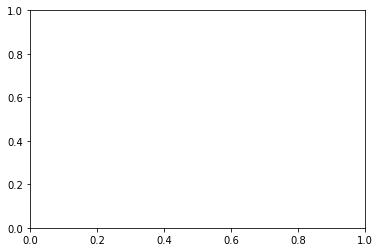

In [23]:
name_label=['OS','BU']
xp=[3,6]
results=[[2,3,5], [2,6,9]]
for i in range(len(results)):
    plt.plot(xp,result_avg[i],'-*',label=name_label[i])

plt.legend()
plt.xlabel('Nombre dobjets')
plt.title('Nombre moyen d allocation')
plt.show()

for i in range(len(results)):
    plt.plot(xp,result_uni[i],'-*',label=name_label[i])

plt.legend()
plt.xlabel('Nombre dobjets')
plt.title('Pourcentage d allocation unique')
plt.show()

for i in range(len(results)):
    plt.plot(xp,result_par[i],'-*',label=name_label[i])

plt.legend()
plt.xlabel('Nombre dobjets')
plt.title('Pourcentage de Bordas Pareto optimal')
plt.show()

for i in range(len(results)):
    plt.plot(xp,result_env[i],'-*',label=name_label[i])

plt.legend()
plt.xlabel('Nombre dobjets')
plt.title('Pourcentage de Bordas Envy-Free')
plt.show()


